## Exercise 2
## Nick Olivier
## DA-6823 Practicum I
## 2018-09-16

#### Packages

In [101]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from IPython.display import Image

#### Import Data

In [11]:
df = pd.read_csv(".../fa12_cleaned.csv", nrows = 5)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
layout = pd.read_csv(".../fa12_layout.txt")

In [12]:
df.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v63936,v63937,v63938,v63939,v63940,v63941,v63942,v63943,v63944,v63945
0,1985951,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1985952,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1985954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1985955,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1985960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Locate the question in pdf image the Technology section labeled “I’m always the first among my friends to have the latest in electronic equipment”.  Then find the associated question in the excel data dictionary.  Use this information to read in the five variables that correspond to the five responses for this question.  Do a frequency for each of the five variables.  If there are missing values you should turn those values into something numeric and useful (e.g. zeroes).

#### Format & Import Data

In [36]:
tech_attitudes = layout[layout.level1 == 'ATTITUDES/OPINIONS - TECHNOLOGY']
first_of_friends = tech_attitudes[tech_attitudes['level3'].str.contains('1ST OF FRNDS')]
fof_varnames = [v for v in first_of_friends['var_name']]
fof_labels = [l.split('-')[2].lstrip().replace(" ", "_") for l in first_of_friends['level2']]
df = pd.read_csv(".../fa12_cleaned.csv", usecols = fof_varnames)
df.columns = fof_labels
df.drop(['ANY_AGREE', 'ANY_DISAGREE'], axis = 1, inplace = True)
df.head(5)

,AGREE_A_LOT,AGREE_A_LITTLE,NEITHER_AGR/DISAGR,DISAGREE_A_LITTLE,DISAGREE_A_LOT
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


#### Frequency Counts

C:\Users\user\Anaconda3\envs\febenv\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


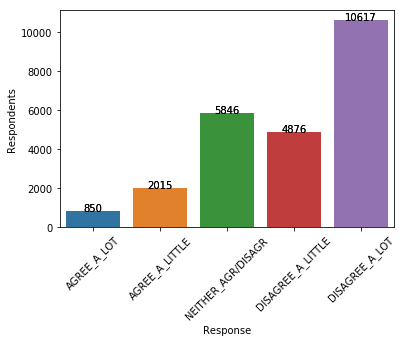

In [50]:
freq_counts = pd.DataFrame({'Response': [i for i in df.sum().index],
                            'Respondents': [s for s in df.sum()]})
p = sns.barplot(x = 'Response',y = 'Respondents', data = freq_counts)
for i, r in freq_counts.iterrows():
    p.text(i, r.Respondents, r.Respondents, color='black', ha="center")
plt.xticks(rotation=45)
plt.show()

## Check to see if any respondent checked more than one check box to this question.  Show me the frequencies that back up your answer to this question.  If they did check more than one box then randomly select one of the answers and modify the data to reflect that.  What is your conclusion about this?

In [62]:
def mult_resp_obs(dat):
    obs_num_list = []
    num_answers_list = []
    for x in range(0, dat.shape[0]):
        obs_num_list.append(x)
        num_answers_list.append(sum(dat.iloc[x,:]))
    resp_counts = pd.DataFrame({'Num_Answers': num_answers_list,
                                'Num_Respondents': obs_num_list}).\
    groupby(['Num_Answers'], as_index = False).\
    agg({'Num_Respondents' : 'nunique'}).\
    sort_values(by = ['Num_Respondents'], ascending = False)
    return resp_counts

* There are no observations with multiple responses, but there are 1,361 values without an answer. These values could be imputed or left as zeroes, depending on the application.

In [63]:
mult_resp_obs(df)

,Num_Answers,Num_Respondents
1,1,24204
0,0,1361


## Combine the five variables into one variable so that it is coded 5=agree a lot, 4= agree a little, 3 = neither agree nor disagree, 2 = disagree a little 1 = disagree a lot.  Do a frequency of that variable.  Then find a way to validate that your combining of the five variables went ok and you didn’t mess it up somewhere.

In [89]:
def flatten_scale(dat):
    temp_list = []
    i_list = []
    for i, x in enumerate(range(0, dat.shape[0])):
        if sum(dat.iloc[i,:]) != 0:
            i_list.append(i)
        else:
            pass
        if dat['AGREE_A_LOT'][i] == 1:
            temp_list.append(5)
        elif dat['AGREE_A_LITTLE'][i] == 1:
            temp_list.append(4)
        elif dat['NEITHER_AGR/DISAGR'][i] == 1:
            temp_list.append(3)
        elif dat['DISAGREE_A_LITTLE'][i] == 1:
            temp_list.append(2)
        elif dat['DISAGREE_A_LOT'][i] == 1:
            temp_list.append(1)
        else:
            pass
    output = pd.DataFrame({'Response': temp_list,
                           'Respondents': i_list}).\
    groupby(['Response'], as_index = False).\
    agg({'Respondents' : 'nunique'}).\
    sort_values(by = ['Response'], ascending = False)
    return output

* Counts based on reduced dimension response data:

In [90]:
flatten_scale(df)

,Response,Respondents
4,5,850
3,4,2015
2,3,5846
1,2,4876
0,1,10617


* Original frequency counts:

In [73]:
freq_counts

,Response,Respondents
0,AGREE_A_LOT,850
1,AGREE_A_LITTLE,2015
2,NEITHER_AGR/DISAGR,5846
3,DISAGREE_A_LITTLE,4876
4,DISAGREE_A_LOT,10617


## Find another question in the Lifestyles and the Internet section that suits your fancy.  Wash, rinse and repeat steps 1 through 4 above for this variable.
### 'CREDIT CARDS - DO YOU HAVE OR USE?'

#### Format & Import Data

In [91]:
cc = layout[layout.level1 == 'CREDIT CARDS']
cc_use = cc[cc['level2'] == 'CREDIT CARDS - DO YOU HAVE OR USE?']
cc_varnames = [v for v in cc_use['var_name']]
cc_labels = [l for l in cc_use['level3']]
df = pd.read_csv(".../fa12_cleaned.csv", usecols = cc_varnames)
df.columns = cc_labels
df.head(5)

,YES,NO,DON'T KNOW/NO ANSWER
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Frequency Counts

C:\Users\user\Anaconda3\envs\febenv\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


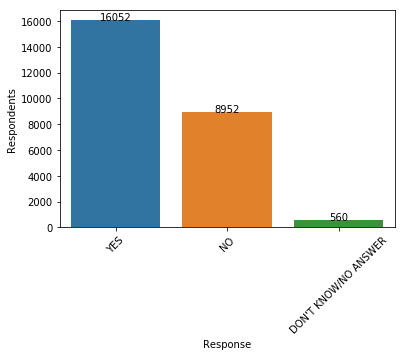

In [92]:
freq_counts = pd.DataFrame({'Response': [i for i in df.sum().index],
                            'Respondents': [s for s in df.sum()]})
p = sns.barplot(x = 'Response',y = 'Respondents', data = freq_counts)
for i, r in freq_counts.iterrows():
    p.text(i, r.Respondents, r.Respondents, color='black', ha="center")
plt.xticks(rotation=45)
plt.show()

## Check to see if any respondent checked more than one check box to this question.  Show me the frequencies that back up your answer to this question.  If they did check more than one box then randomly select one of the answers and modify the data to reflect that.  What is your conclusion about this?

* There are no observations with multiple responses, but there is 1 value without an answer.

In [93]:
mult_resp_obs(df)

,Num_Answers,Num_Respondents
1,1,25564
0,0,1


## Convert dummy coded data into flat representation and compare counts with prior frequency counts.

In [99]:
def flatten_scale(dat):
    temp_list = []
    i_list = []
    for i, x in enumerate(range(0, dat.shape[0])):
        if sum(dat.iloc[i,:]) != 0:
            i_list.append(i)
        else:
            pass
        if dat['YES'][i] == 1:
            temp_list.append(1)
        elif dat['NO'][i] == 1:
            temp_list.append(2)
        elif dat["DON'T KNOW/NO ANSWER"][i] == 1:
            temp_list.append(3)
        else:
            pass
    output = pd.DataFrame({'Response': temp_list,
                           'Respondents': i_list}).\
    groupby(['Response'], as_index = False).\
    agg({'Respondents' : 'nunique'}).\
    sort_values(by = ['Response'])
    return output

* Counts based on reduced dimension response data:

In [100]:
flatten_scale(df)

,Response,Respondents
0,1,16052
1,2,8952
2,3,560


* Original Frequency Counts:

In [97]:
freq_counts

,Response,Respondents
0,YES,16052
1,NO,8952
2,DON'T KNOW/NO ANSWER,560


## Find the pdf image of the NCS survey booklet and go to page 134 (that is the pdf page – the actual survey page in the print version is page 130).  You will see that this page has two sections – Technology and Lifestyles and the Internet.  Print this page out and put it in your Appendix.

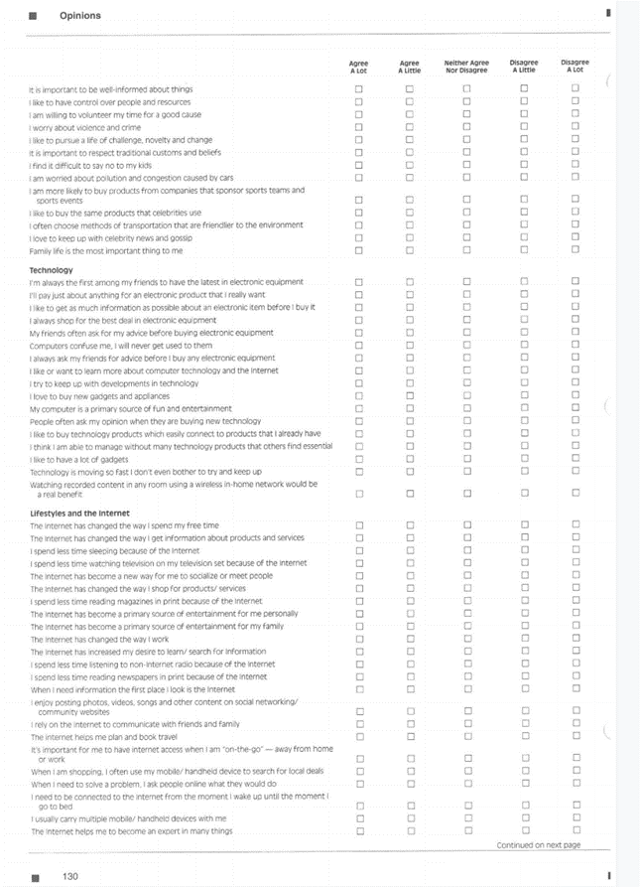

In [105]:
Image(filename = "C:/Users/user/Documents/school/practicum/surveypic.png", width=800, height=1300)